In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [2]:
path = '/content/drive/My Drive/Colab Notebooks/Hackerearth/Test.csv'
data0 = pd.read_csv(path)
data0.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [3]:
path = '/content/drive/My Drive/Colab Notebooks/Hackerearth/Train.csv'
data1 = pd.read_csv(path)
data1.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [4]:
data = data1.append(data0,ignore_index=True)
data.tail()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
9995,EID_22547,F,32.0,3,Single,Franklin,Sales,Directive,3.0,3,38,1,3,6.0,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4,NaN
9996,EID_10066,F,NaN,2,Single,Franklin,Marketing,Conceptual,10.0,2,57,1,4,9.0,type2,1.0,3,0.7516,0.7075,3.0,4,8,3,NaN
9997,EID_7126,F,60.0,4,Single,Lebanon,Logistics,Analytical,35.0,1,69,0,2,9.0,type3,3.0,3,-1.8176,-0.4537,NaN,4,8,4,NaN
9998,EID_4929,F,51.0,1,Married,Springfield,IT,Behavioral,23.0,1,30,0,2,6.0,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2,NaN
9999,EID_24750,F,45.0,1,Single,Franklin,Sales,Directive,12.0,4,70,1,2,8.0,type4,4.0,3,0.7516,-0.4537,2.0,2,8,5,NaN


Catogorical : Gender, Relationship_Status, Unit, Decision_skill_possess, Compensation_and_Benefits, Hometown

In [5]:
data[["Gender", "Relationship_Status", "Unit", "Decision_skill_possess", "Compensation_and_Benefits", "Hometown"]].head()

,Gender,Relationship_Status,Unit,Decision_skill_possess,Compensation_and_Benefits,Hometown
0,F,Married,IT,Conceptual,type2,Franklin
1,M,Single,Logistics,Analytical,type2,Springfield
2,F,Married,Quality,Conceptual,type2,Clinton
3,F,Single,Human Resource Management,Behavioral,type2,Lebanon
4,F,Married,Logistics,Conceptual,type3,Springfield


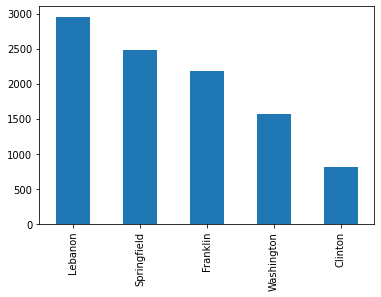

In [6]:
data["Hometown"].value_counts(dropna=False).plot(kind='bar')

In [7]:
train_features = pd.get_dummies(data['Gender'])
train_features = train_features.iloc[:,:-1]
train_features.loc[np.all(train_features == 0,axis=1)] = -1.
train_features.head()

RS_features = pd.get_dummies(data['Relationship_Status'])
RS_features = RS_features.iloc[:,:-1]
RS_features.loc[np.all(RS_features == 0,axis=1)] = -1.
RS_features.head()

Un_features = pd.get_dummies(data['Unit'])
Un_features = Un_features.iloc[:,:-1]
Un_features.loc[np.all(RS_features == 0,axis=1)] = -1.
Un_features.head()

Ds_features = pd.get_dummies(data['Decision_skill_possess'])
Ds_features = Ds_features.iloc[:,:-1]
Ds_features.loc[np.all(RS_features == 0,axis=1)] = -1.
Ds_features.head()

CB_features = pd.get_dummies(data['Compensation_and_Benefits'])
CB_features = CB_features.iloc[:,:-1]
CB_features.loc[np.all(RS_features == 0,axis=1)] = -1.
CB_features.head()

Ht_features = pd.get_dummies(data['Hometown'])
Ht_features = Ht_features.iloc[:,:-1]
Ht_features.loc[np.all(RS_features == 0,axis=1)] = -1.
Ht_features.head()


train_features = pd.concat([train_features, RS_features, Un_features, Ds_features, CB_features, Ht_features], axis=1)
train_features.head()

,F,Married,Accounting and Finance,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Analytical,Behavioral,Conceptual,type0,type1,type2,type3,Clinton,Franklin,Lebanon,Springfield
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


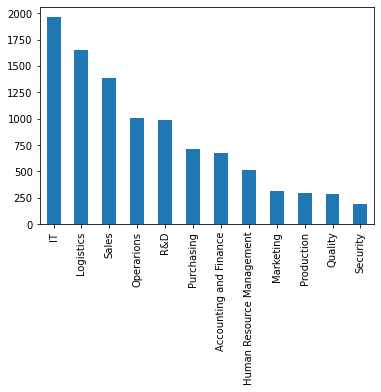

In [8]:
data["Unit"].value_counts(dropna=False).plot(kind='bar')

In [9]:
data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


Numericals : Age, Education_Level, Time_of_service, Time_since_promotion, growth_rate, Travel_Rate, Post_Level, Pay_Scale, Work_Life_balance, VAR1, VAR2, VAR3, VAR4, VAR5, VAR6, VAR7

In [10]:
data[["Age", "Education_Level", "Time_of_service", 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7']].head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,NaN,3,7,3
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2


In [11]:
val = data[["Age", "Education_Level", "Time_of_service", 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7']].values
val

array([[42.,  4.,  4., ...,  4.,  5.,  3.],
       [24.,  3.,  5., ...,  3.,  5.,  3.],
       [58.,  3., 27., ...,  3.,  8.,  3.],
       ...,
       [60.,  4., 35., ...,  4.,  8.,  4.],
       [51.,  1., 23., ...,  3.,  9.,  2.],
       [45.,  1., 12., ...,  2.,  8.,  5.]])

Missing Values

In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(val)
val = imputer.transform(val)
val

array([[42.,  4.,  4., ...,  4.,  5.,  3.],
       [24.,  3.,  5., ...,  3.,  5.,  3.],
       [58.,  3., 27., ...,  3.,  8.,  3.],
       ...,
       [60.,  4., 35., ...,  4.,  8.,  4.],
       [51.,  1., 23., ...,  3.,  9.,  2.],
       [45.,  1., 12., ...,  2.,  8.,  5.]])

In [13]:
val = pd.DataFrame(val,columns=["Age", "Education_Level", "Time_of_service", 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'])
val.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,42.0,4.0,4.0,4.0,33.0,1.0,1.0,7.0,3.0,4.0,0.7516,1.8688,2.000000,4.0,5.0,3.0
1,24.0,3.0,5.0,4.0,36.0,0.0,3.0,6.0,4.0,3.0,-0.9612,-0.4537,2.000000,3.0,5.0,3.0
2,58.0,3.0,27.0,3.0,51.0,0.0,2.0,8.0,1.0,4.0,-0.9612,-0.4537,3.000000,3.0,8.0,3.0
3,26.0,3.0,4.0,3.0,56.0,1.0,3.0,8.0,1.0,3.0,-1.8176,-0.4537,1.895976,3.0,7.0,3.0
4,31.0,1.0,5.0,4.0,62.0,1.0,3.0,2.0,3.0,1.0,0.7516,-0.4537,2.000000,2.0,8.0,2.0


Normalize

In [14]:
float_array = val.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
scaled_array

array([[0.5       , 0.75      , 0.09302326, ..., 0.75      , 0.        ,
        0.5       ],
       [0.10869565, 0.5       , 0.11627907, ..., 0.5       , 0.        ,
        0.5       ],
       [0.84782609, 0.5       , 0.62790698, ..., 0.5       , 0.75      ,
        0.5       ],
       ...,
       [0.89130435, 0.75      , 0.81395349, ..., 0.75      , 0.75      ,
        0.75      ],
       [0.69565217, 0.        , 0.53488372, ..., 0.5       , 1.        ,
        0.25      ],
       [0.56521739, 0.        , 0.27906977, ..., 0.25      , 0.75      ,
        1.        ]])

In [15]:
val = pd.DataFrame(scaled_array,columns=["Age", "Education_Level", "Time_of_service", 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'])
val.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0.500000,0.75,0.093023,1.00,0.240741,0.5,0.00,0.666667,0.50,0.75,0.749978,1.0,0.500000,0.75,0.00,0.50
1,0.108696,0.50,0.116279,1.00,0.296296,0.0,0.50,0.555556,0.75,0.50,0.249993,0.5,0.500000,0.50,0.00,0.50
2,0.847826,0.50,0.627907,0.75,0.574074,0.0,0.25,0.777778,0.00,0.75,0.249993,0.5,1.000000,0.50,0.75,0.50
3,0.152174,0.50,0.093023,0.75,0.666667,0.5,0.50,0.777778,0.00,0.50,0.000000,0.5,0.447988,0.50,0.50,0.50
4,0.260870,0.00,0.116279,1.00,0.777778,0.5,0.50,0.111111,0.50,0.00,0.749978,0.5,0.500000,0.25,0.75,0.25


In [16]:
features = pd.concat([train_features,val],axis=1)
features.head()

,F,Married,Accounting and Finance,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Analytical,Behavioral,Conceptual,type0,type1,type2,type3,Clinton,Franklin,Lebanon,Springfield,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.75,0.093023,1.00,0.240741,0.5,0.00,0.666667,0.50,0.75,0.749978,1.0,0.500000,0.75,0.00,0.50
1,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.108696,0.50,0.116279,1.00,0.296296,0.0,0.50,0.555556,0.75,0.50,0.249993,0.5,0.500000,0.50,0.00,0.50
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.847826,0.50,0.627907,0.75,0.574074,0.0,0.25,0.777778,0.00,0.75,0.249993,0.5,1.000000,0.50,0.75,0.50
3,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.152174,0.50,0.093023,0.75,0.666667,0.5,0.50,0.777778,0.00,0.50,0.000000,0.5,0.447988,0.50,0.50,0.50
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.260870,0.00,0.116279,1.00,0.777778,0.5,0.50,0.111111,0.50,0.00,0.749978,0.5,0.500000,0.25,0.75,0.25


In [17]:
features = pd.concat([data['Attrition_rate'],features],axis=1)
features.head()

,Attrition_rate,F,Married,Accounting and Finance,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Analytical,Behavioral,Conceptual,type0,type1,type2,type3,Clinton,Franklin,Lebanon,Springfield,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0.1841,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.75,0.093023,1.00,0.240741,0.5,0.00,0.666667,0.50,0.75,0.749978,1.0,0.500000,0.75,0.00,0.50
1,0.0670,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.108696,0.50,0.116279,1.00,0.296296,0.0,0.50,0.555556,0.75,0.50,0.249993,0.5,0.500000,0.50,0.00,0.50
2,0.0851,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.847826,0.50,0.627907,0.75,0.574074,0.0,0.25,0.777778,0.00,0.75,0.249993,0.5,1.000000,0.50,0.75,0.50
3,0.0668,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.152174,0.50,0.093023,0.75,0.666667,0.5,0.50,0.777778,0.00,0.50,0.000000,0.5,0.447988,0.50,0.50,0.50
4,0.1827,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.260870,0.00,0.116279,1.00,0.777778,0.5,0.50,0.111111,0.50,0.00,0.749978,0.5,0.500000,0.25,0.75,0.25


In [18]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Attrition_rate             7000 non-null   float64
 1   F                          10000 non-null  float64
 2   Married                    10000 non-null  float64
 3   Accounting and Finance     10000 non-null  float64
 4   Human Resource Management  10000 non-null  float64
 5   IT                         10000 non-null  float64
 6   Logistics                  10000 non-null  float64
 7   Marketing                  10000 non-null  float64
 8   Operarions                 10000 non-null  float64
 9   Production                 10000 non-null  float64
 10  Purchasing                 10000 non-null  float64
 11  Quality                    10000 non-null  float64
 12  R&D                        10000 non-null  float64
 13  Sales                      10000 non-null  floa

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
Train , Test = train_test_split(features[features['Attrition_rate'].notnull()],test_size=0.2)

In [22]:
X_train = Train.drop(['Attrition_rate'],axis=1)
y_train = Train['Attrition_rate']
X_test = Test.drop(['Attrition_rate'],axis=1)
y_test = Test['Attrition_rate']

In [23]:
model = Sequential()
model.add(Dense(128, kernel_initializer = "uniform", input_dim=40, activation='relu'))
# model.add(Dense(256, kernel_initializer = "uniform", activation='relu'))
model.add(Dense(32, kernel_initializer = "uniform", activation='relu'))
model.add(Dense(1))

In [24]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [30]:
# fit the keras model on the dataset
# for i in range(5):
model.fit(features[features['Attrition_rate'].notnull()].drop(['Attrition_rate'],axis=1),features[features['Attrition_rate'].notnull()]['Attrition_rate'], epochs=1,validation_split=0.2)
print(np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test,model.predict(X_test))))

175/175 [==============================] - 0s 2ms/step - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
0.18387579055565584
0.17782633232539255


In [27]:
print(np.sqrt(mean_squared_error(y_train,model.predict(X_train))))

0.18567901191373676


In [104]:
model.predict(features[features['Attrition_rate'].isnull()].drop(['Attrition_rate'],axis=1)).reshape(3000)

array([0.21410663, 0.17072612, 0.17404881, ..., 0.18271928, 0.15789782,
       0.20116526], dtype=float32)

In [31]:
sol = pd.DataFrame({"Employee_ID":data0['Employee_ID'],"Attrition_rate":model.predict(features[features['Attrition_rate'].isnull()].drop(['Attrition_rate'],axis=1)).reshape(3000)})
sol.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.214276
1,EID_9658,0.235285
2,EID_22203,0.183168
3,EID_7652,0.198413
4,EID_6516,0.211333


In [32]:
sol.to_csv('/content/drive/My Drive/Colab Notebooks/Hackerearth/submission1.csv',index=False)